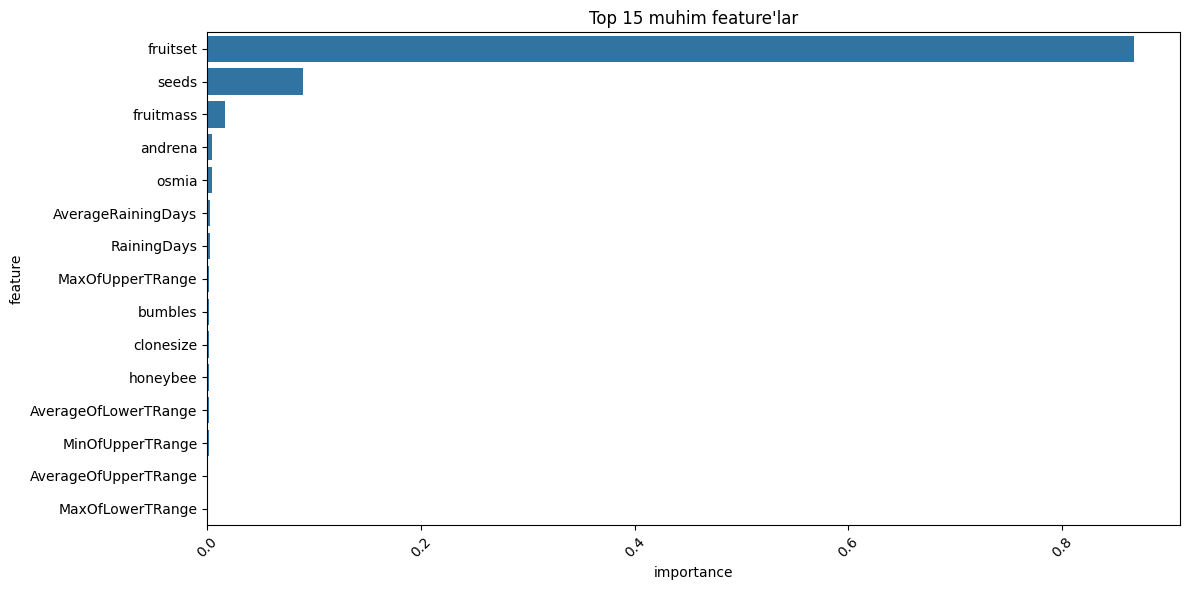

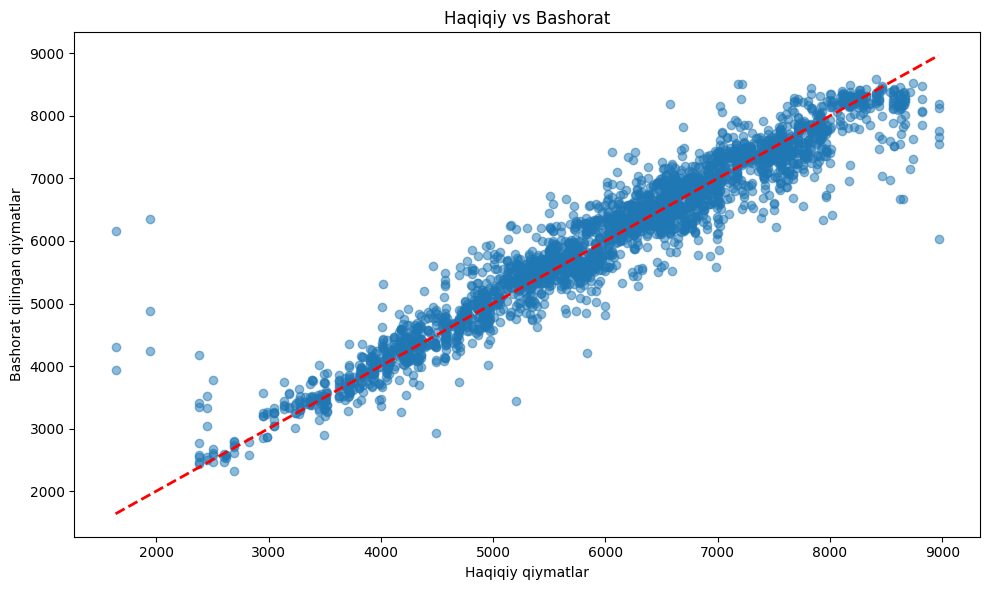

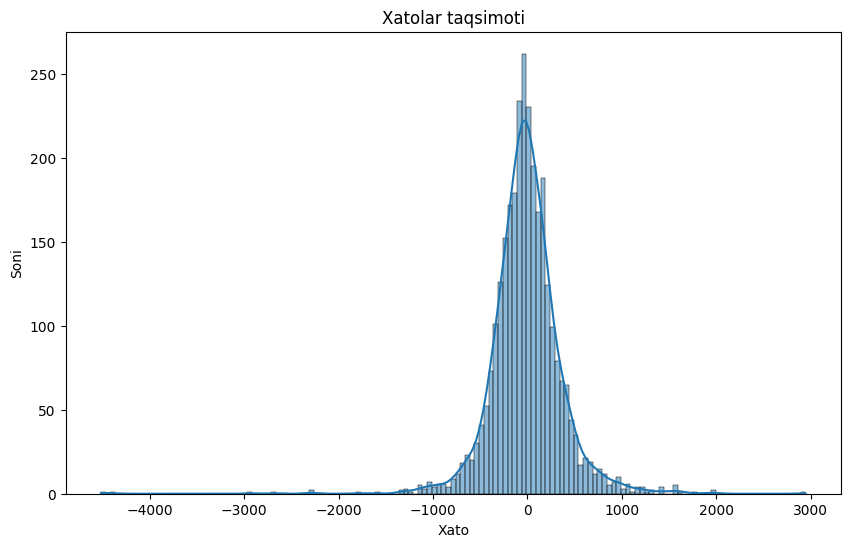

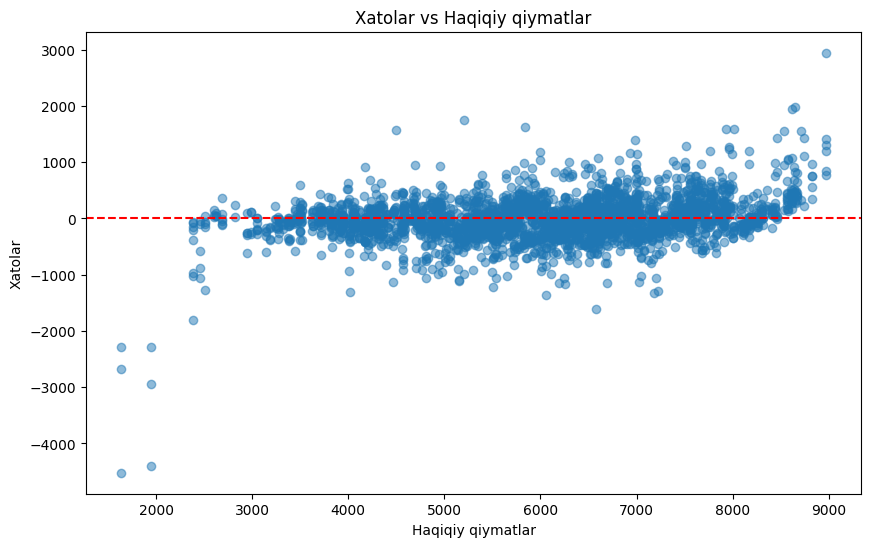


Test bashoratlari submission.csv fayliga saqlandi


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X = train.drop(['yield', 'id', 'Row#'], axis=1)
y = train['yield']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)



feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 muhim feature\'lar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_valid, valid_predictions, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=2)
plt.xlabel('Haqiqiy qiymatlar')
plt.ylabel('Bashorat qilingan qiymatlar')
plt.title('Haqiqiy vs Bashorat')
plt.tight_layout()
plt.show()

errors = y_valid - valid_predictions
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Xatolar taqsimoti')
plt.xlabel('Xato')
plt.ylabel('Soni')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_valid, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Haqiqiy qiymatlar')
plt.ylabel('Xatolar')
plt.title('Xatolar vs Haqiqiy qiymatlar')
plt.show()

X_test = test.drop(['id', 'Row#'], axis=1)
test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'id': test['id'],
    'yield': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("\nTest bashoratlari submission.csv fayliga saqlandi")
